In [ ]:
https://archive.ics.uci.edu/dataset/186/wine+quality

In [1]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [44]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [3]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [4]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [ ]:
y.value_counts()   #데이터 불균형????

quality
6          2836
5          2138
7          1079
4           216
8           193
3            30
9             5
Name: count, dtype: int64

In [ ]:
# step 1
# 학습용 테스트용 데이터 분류
# 학습
# 평가 .score ---> accuracy

# step 2
# 각종 시각화를 통해 컬럼의 특성을 평가
# 학습용 컬럼을 선정
# 전처리
# 학습
# 평가 .score ---> accuracy

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.quality, test_size=0.2, random_state=42, stratify=y) 
                                                 #Please change the shape of y to (n_samples,) : y값 확인 y.quality.shape /// y.shape
                                                 #클래스 불균형 해소 stratify=y
print(len(X_train), len(y_train))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(f'정확도 Accuracy : {score}')

from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

5197 5197
정확도 Accuracy : 0.48615384615384616
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.16      0.07      0.10        43
           5       0.46      0.54      0.50       428
           6       0.53      0.58      0.55       567
           7       0.42      0.29      0.34       216
           8       0.43      0.15      0.23        39
           9       0.00      0.00      0.00         1

    accuracy                           0.49      1300
   macro avg       0.29      0.23      0.25      1300
weighted avg       0.47      0.49      0.47      1300



d:\0python_SNC\streamlit_prj\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\0python_SNC\streamlit_prj\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\0python_SNC\streamlit_prj\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [16]:
y.quality.shape
y.shape

(6497, 1)

In [29]:
# 클래스 불균형 문제 해결
y.value_counts()

quality
6          2836
5          2138
7          1079
4           216
8           193
3            30
9             5
Name: count, dtype: int64

In [ ]:
# 오버 샘플링 : 정보 손실 없이 소수클래스의 특징을 강화 - 데이터 증강
# SMOTE Synthtic Minority Over-sampling Technique
# 비슷한 데이터들 사이에 새로운 데이터를 생성 - 기존 데이터의 정보를 활용

# ====DJ====
# 불균형 데이터셋에서 소수 클래스의 데이터를 인위적으로 생성하여 데이터의 균형을 맞추는 오버샘플링 기법입니다.
# 단순히 데이터를 복제하는 대신, k-NN 알고리즘을 사용하여 기존 소수 샘플과 이웃 샘플 사이의 직선 보간을 통해 
# 새로운 합성 샘플을 생성하여 데이터의 다양성을 늘립니다

# SMOTE는
# 👉 “데이터가 적은 쪽(병 걸린 사람 쪽)을 복제해서 늘려주는 기술**이에요.
# 하지만 단순 복사가 아니고,
# “비슷한 새로운 데이터”를 만들어내요!

original shape : Counter({np.int64(0): 947, np.int64(1): 53})
resampled shape : Counter({np.int64(0): 947, np.int64(1): 947})


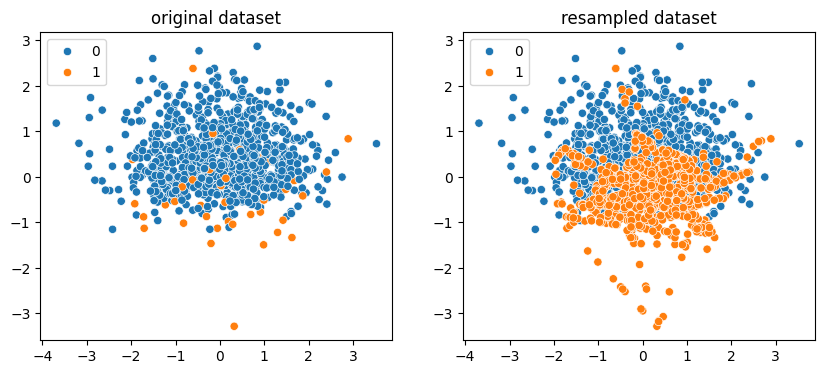

In [ ]:
# SMOTE 로 데이터 증폭
# 예시

from sklearn.datasets import make_classification
from collections import Counter
X,y = make_classification (n_samples=1000, n_classes=2, random_state=42, weights=[0.95, 0.05])
print(f'original shape : {Counter(y)}')
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)
print(f'resampled shape : {Counter(y_resampled)}')

#시각화
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(1,2, figsize=(10,4))
sns.scatterplot(x=X[:, 0], y=X[:,1], hue=y, ax=ax[0])
ax[0].set_title('original dataset')
sns.scatterplot(x=X_resampled[:, 0], y=X_resampled[:,1], hue=y_resampled, ax=ax[1])
ax[1].set_title('resampled dataset');

In [49]:

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 


# 데이터 증강
smote=SMOTE(random_state=42, k_neighbors=4)
X, y = smote.fit_resample(X,y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.quality, test_size=0.2, random_state=42, stratify=y) 
print (Counter(y_train))
print(len(X_train), len(y_train))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(f'정확도 Accuracy : {score}')

from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report( y_test, y_pred))


Counter({7: 2269, 4: 2269, 8: 2269, 3: 2269, 5: 2269, 6: 2268, 9: 2268})
15881 15881
정확도 Accuracy : 0.7788970032737346
              precision    recall  f1-score   support

           3       0.85      0.96      0.90       567
           4       0.76      0.91      0.83       567
           5       0.63      0.52      0.57       567
           6       0.58      0.35      0.44       568
           7       0.71      0.78      0.74       567
           8       0.86      0.94      0.90       567
           9       0.92      1.00      0.96       568

    accuracy                           0.78      3971
   macro avg       0.76      0.78      0.76      3971
weighted avg       0.76      0.78      0.76      3971



##데이터 증폭 전 결과와 비교

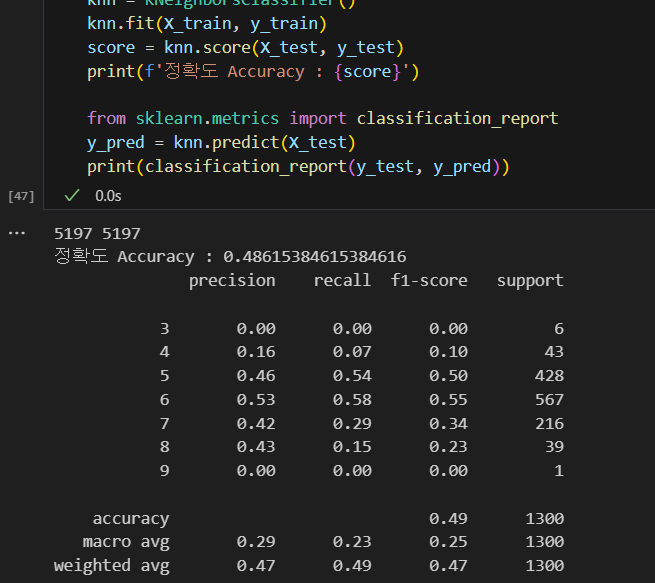